In [1]:
#@title Setup
!pip install -qqq tock
from tock import *
from tock.syntax import String
import itertools
!test -x /content/theory || git clone --quiet https://github.com/ND-CSE-30151/spring-2023 /content/theory
%cd -q /content/theory/notes


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.5/536.5 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


# Notebook 9: Non-regular languages

<div class="alert alert-info"><p><b>Read</b> Section 1.4, focusing on pages 77-79.</p></div>

We've seen that three computational models (DFA, NFA, regular expression) turn out to recognize the same class of languages, the regular languages. Are there languages that aren't regular? Definitely -- the two classic examples are

$$ B = \{\mathtt{0}^n \mathtt{1}^n \mid n \geq 0\} $$
$$ G = \{w w^R \mid w \in \{\mathtt{0}, \mathtt{1}\}^\ast \} $$

The intuitive reason why is: If I give you two strings $u, v$, what information would you need about $u$ to decide whether $uv$ is in the language? Let's say that $L$ is the language of natural base-10 numbers that are divisible by 3. Recall that a number is divisible by 3 iff its digits sum to a multiple of 3. So the only information that you need about $u$ is the sum of its digits, _modulo 3_. That's a finite amount of information, so the language is regular.

Now consider $B$. If I give you $u=\mathtt{000001}$, the only $v$ that matches up with it is $v=\mathtt{1111}$. The information that you need about $u$ is how many $\mathtt{0}$'s it contains -- which can be unbounded. So, intuitively, this is not a regular language.

But how do we really prove that $B$ is not regular? To do this, we entertain the possibility that it *is* regular. If there were a DFA $M$ that recognizes $B$, we try to "break" it by finding a string that is *not* in $B$ but *is* accepted by $M$. If we show that we can break *all* possible DFAs in this way, then that means we've shown that there is *no* DFA that recognizes $B$. So $B$ is not regular.

The way that we are going to find the string that breaks $M$ involves a back-and-forth that is best thought of as a dialogue. Below, we imagine a dialogue between two people named Anna and Elsa. (Their names start with A and E because they correspond with $\forall$ and $\exists$ in the statement of the pumping lemma.) Elsa proposes $M$. Anna gives Elsa a "test" string $s$ that $M$ is supposed to accept. But then, she uses the information that Elsa reveals to concoct another string, and this is the one that breaks $M$.

## A dialogue

Anna. The language $B = \{\texttt{0}^n \texttt{1}^n \mid n \geq 0\}$ is not regular.

Elsa. Yes it is!

Anna. Oh really, then show me a DFA that generates it.

Elsa. Here's one:

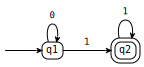

In [2]:
m = read_csv("pumping1.csv")
m

Anna. How many states does it have?

Elsa. Let me see...

In [3]:
p = len(m.states)
p

2

Anna. Does your automaton accept the string $s = \texttt{0}^p \texttt{1}^p$?

In [4]:
s = String(['0']*p + ['1']*p)
s

String(values=('0', '0', '1', '1'))

Elsa. Let me see...

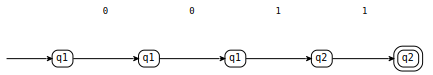

Yes.


In [5]:
graph = run(m, s)
display(graph)
path = graph.only_path()
if path.accept:
    print('Yes.')
else:
    print('No, I lose.')

Anna. Does this run use a state twice while reading in the first half of the string?

Elsa. Let me see...

In [6]:
if path.accept:
    for i, j in itertools.combinations(range(p+1), 2):
        if path[i][0] == path[j][0]:
            print(f'Yes, the state is {path[i][0]}.')
            break
    else:
        print("No (this shouldn't happen).")
else:
    print("Let it go!")

Yes, the state is q1.


Anna. What are the strings that it reads up to the first visit, between the first and second visits, and after the second visit?

Elsa. Let me see...

In [7]:
if path.accept:
    x = String(s[:i])
    y = String(s[i:j])
    z = String(s[j:])
    print(f'{x}, {y}, and {z}')
else:
    print("Let it go!")
    x = y = z = []

ε, 0, and 0 1 1


Anna. So, does your automaton accept this string?

In [8]:
s2 = x + 2 * y + z
s2

String(values=('0', '0', '0', '1', '1'))

Elsa. Let me see...

In [9]:
if path.accept:
    p2 = run(m, s2).only_path()
    if p2.accept:
        print('Yes, I lose.')
    else:
        print("No (this shouldn't happen).")
else:
    print("Let it go!")

Yes, I lose.


Try loading some other automata (`pumping2.csv`, `pumping3.csv`) to see how poor Elsa always loses.

## The dialogue explained

Anna first chooses $s = \texttt{0}^p \texttt{1}^p$, which she knows belongs to $B$. Hopefully it will become clear soon why she chooses this particular string.

Anna knows that Elsa's DFA $M$, which supposedly recognizes $B$, has $p$ states. And on reading the first $p$ symbols, this automaton must make $(p+1)$ visits to states: first the start state, then one for each symbol. By the [pigeonhole principle](https://en.wikipedia.org/wiki/Pigeonhole_principle), two of these visits must be to the same state. So when she asks Elsa whether this happens, she knows that the answer must be yes.

Now let $x$ be the part of the string read before the first visit, let $y$ be the part of the string read between the two visits, and let $z$ be the part of the string read after the second visit. Anna knows that $y$ is nonempty because $M$ is a DFA, and $|xy| \leq p$ because the repeat must occur within the first $p$ symbols. Her choice of $s$, then, guarantees that $y$ consists of one or more $\texttt{0}$'s and no $\texttt{1}$'s.

Here's what the accepting path for $s$ looks like:

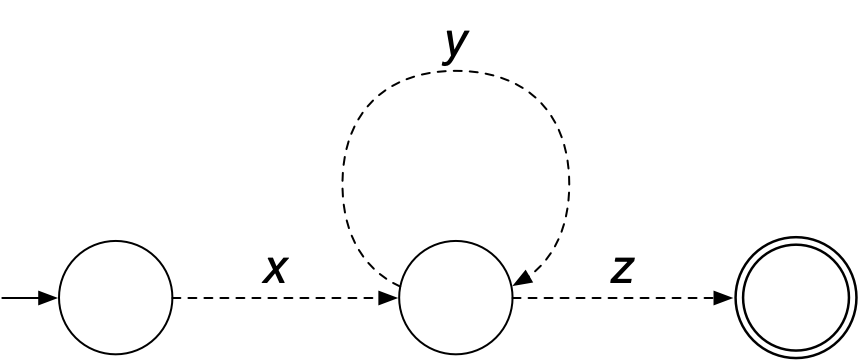

The dashed line stands for one or more transitions. By going around the loop zero times, we get an accepting path for $xz$; by going around the loop two times, we get accepting path for $xyyz$; and in general, by going around the loop $i$ times, we get an accepting path for $xy^iz$. So all of these strings must be accepted by $M$.

Anna chooses one of these strings. In this case, the choice doesn't matter too much; she chooses $i=2$. But because $y$ consists of one or more $\texttt{0}$'s and no $\texttt{1}$'s, $xyyz$ has more $\texttt{0}$'s than $\texttt{1}$'s and therefore does not belong to $B$.

Since $M$ accepts $xyyz$ but $xyyz \not\in B$, $M$ does not recognize $B$.

## The dialogue becomes a proof

Now we distill the dialogue into a proof.

Claim: The language $B = \{\texttt{0}^n \texttt{1}^n \mid n \geq 0\}$ is not regular.

Proof: Suppose, for the sake of contradiction, that there is a DFA $M$ that recognizes $B$. Let $p$ be the number of states in $M$. Let $s = \texttt{0}^p \texttt{1}^p$, which belongs to $B$, so is accepted by $M$. On reading the first $p$ symbols of $s$, $M$ makes $(p+1)$ visits to states (the start state plus one for each symbol). But $M$ has only $p$ states, so by the pigeonhole principle, it must visit the same state $q$ twice while reading the first $p$ symbols.

Let $x$ be the string read before the first visit to $q$, let $y$ be the string read between the first two visits to $q$, and let $z$ be the rest of the string. We know that $y$ must be nonempty because $M$ is a DFA, and $y$ must contain only $\texttt{0}$s, because the repeat visit to $q$ occurred within the first $p$ symbols of $s$.

So $xyyz$ has more $\texttt{0}$'s than $\texttt{1}$'s, so it does not belong to $B$. But $M$ must accept $xyyz$. This contradicts the assumption that $M$ recognizes $B$.

## The pumping lemma

If you were to write more and more of these proofs, however, you would find yourself making the same argument over and over. The pumping lemma is like a boilerplate non-regularity proof that you can use to simplify your proofs.

The lemma itself goes like this: Let $A$ be a regular language. Then

1. there exists a $p \geq 1$ such that
2. for all $s \in A$ such that $|s| \geq p$,
3. there exist $x, y, z$ such that $s = xyz$, $|y| > 0$, $|xy| \leq p$ and
4. for all $i \geq 0$, $x y^i z \in A$.

And here is how you use it:

Claim: The language $B = \{\texttt{0}^n \texttt{1}^n \mid n \geq 0\}$ is not regular.

Proof: Suppose, for the sake of contradiction, that $B$ is regular. By the pumping lemma for regular languages, there is a $p \geq 1$ (line 1) such that any $s \in B$ such that $|s| \geq p$ can be written as $s = xyz$, where $|y| > 0$, $|xy| \leq p$, and for all $i$, $x y^i z \in B$.

Let $s = \texttt{0}^p \texttt{1}^p$ (line 2). Then the pumping lemma writes $s$ as $xyz$, where $|y| > 0$ and $|xy| \leq p$ (line 3), which means that $y$ consists of one or more $\texttt{0}$'s. Let $i=2$. The pumping lemma says (line 4) that $xy^iz \in B$, but $xy^iz$ contains more $\texttt{0}$s than $\texttt{1}$s, which is a contradiction.

The advantage is that this proof is shorter and doesn't need to make reference to an actual automaton. If you prefer to use the longer form, it's fine with me. But, regardless, you need to understand the argument, and it's critical that you remember which variables you get to choose and which variables you don't get to choose. Your job, as Anna, is to choose $s$ (line 2) and $i$ (line 4), and to produce a contradiction, namely, that $xy^iz$ does not belong to the language. Elsa chooses $p$ (line 1) and $xyz$ (line 3); since you don't get to choose them, you must write your argument to work for any values of $p$ and $xyz$.

## More practice with the pumping lemma

**Question.** Prove that $G = \{ ww^R \mid w \in \{\mathtt{0},\mathtt{1}\}^\ast\}$ is not regular.

**Question.** Prove that $C = \{w \in \{\mathtt{0}, \mathtt{1}\}^\ast \mid \text{$w$ contains an equal number of $\mathtt{0}$'s and $\mathtt{1}$'s}\}$ is not regular.